# CT normalization

In [1]:
import numpy as np 
import SimpleITK as sitk 
from matplotlib import pyplot as plt

# 读取DICOM文件
dicom_file_path = 'C:/E/CHEN/Data/POPI/4DCT-Dicom/00/00-slice078.dcm'
dicom_image = sitk.ReadImage(dicom_file_path)
dicom_array = sitk.GetArrayFromImage(dicom_image)

In [2]:
sitkImage = sitk.GetImageFromArray(dicom_array)
sitkImage.GetSize()

(512, 512, 1)

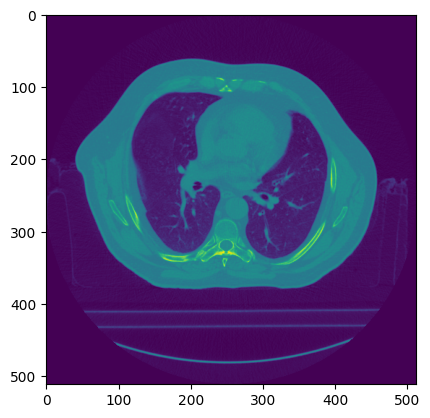

In [3]:
for i in range(dicom_array.shape[0]):
    plt.imshow(dicom_array[i])
    plt.show()

[[[-1008  -989  -993 ... -1003 -1012 -1008]
  [-1020 -1016 -1000 ... -1024 -1006  -996]
  [ -989  -998 -1006 ... -1015 -1000 -1006]
  ...
  [ -969  -975  -970 ...  -963  -953  -933]
  [ -987  -961  -951 ...  -968  -972  -955]
  [ -977  -934  -940 ...  -946  -941  -936]]]


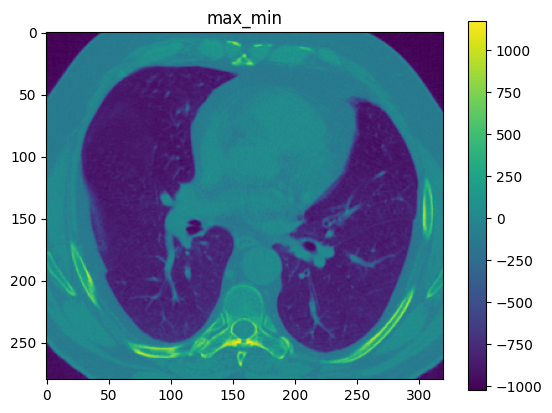

In [4]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

# 读取DICOM文件
dicom_file_path = 'C:/E/CHEN/Data/POPI/4DCT-Dicom/00/00-slice078.dcm'
dicom_image = sitk.ReadImage(dicom_file_path)

# 获取图像数据（像素）
dicom_array = sitk.GetArrayFromImage(dicom_image)

# 定义感兴趣区域的坐标范围（左上角和右下角的像素坐标）
x1, y1 = 90, 80  # 左上角坐标
x2, y2 = 410, 360  # 右下角坐标

# 提取感兴趣区域的像素值
roi_pixels = dicom_array[:, y1:y2, x1:x2]
dicom_array = dicom_array[0,  y1:y2, x1:x2]

# 输出感兴趣区域的像素值
print(roi_pixels)
# 显示感兴趣区域
plt.imshow(dicom_array)
plt.title("max_min")
plt.colorbar()
plt.show()

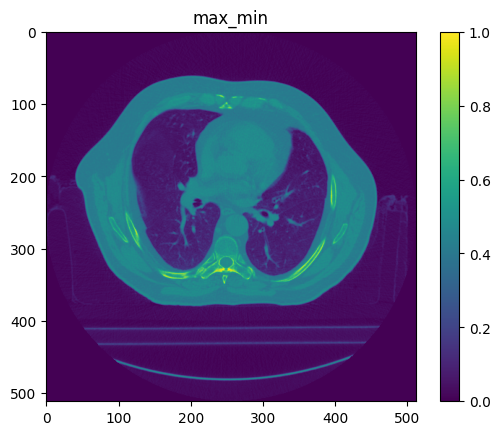

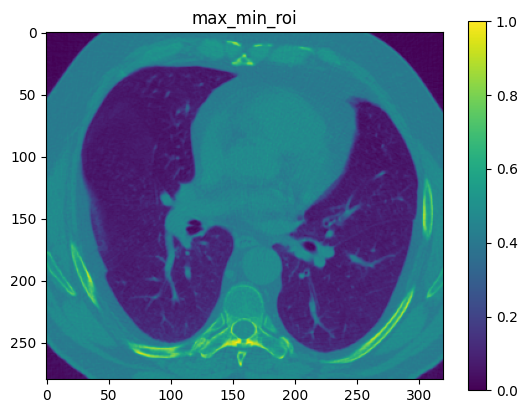

In [5]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

# 读取DICOM文件
dicom_file_path = 'C:/E/CHEN/Data/POPI/4DCT-Dicom/00/00-slice078.dcm'
dicom_image = sitk.ReadImage(dicom_file_path)

# 获取图像数据（像素）
dicom_array = sitk.GetArrayFromImage(dicom_image)

max_value = dicom_array.max()
min_value = dicom_array.min()
img_array = (dicom_array - min_value) / (max_value - min_value)
# img_array = img_array * 255
img_array1 = img_array[0, :, :]

# 显示冠状面
plt.imshow(img_array1)
plt.title("max_min")
plt.colorbar()
plt.show()

# 定义感兴趣区域的坐标范围（左上角和右下角的像素坐标）
x1, y1 = 90, 80  # 左上角坐标
x2, y2 = 410, 360  # 右下角坐标
img_array2 = img_array[0, y1:y2, x1:x2]
# 显示冠状面
plt.imshow(img_array2)
plt.title("max_min_roi")
plt.colorbar()
plt.show()

numpy映射：img_array = np.interp(dicom_array, (dicom_array.min(), dicom_array.max()), (0, 1))

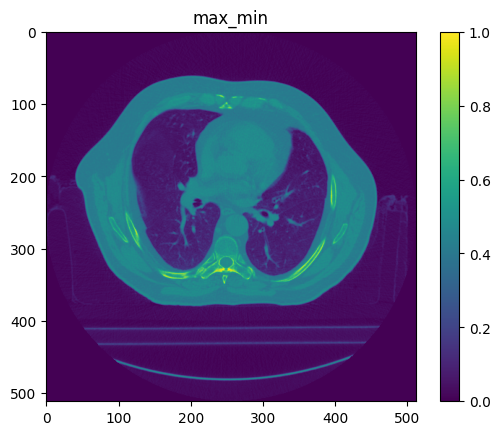

In [26]:
import numpy as np 
import SimpleITK as sitk
import matplotlib.pyplot as plt

# 读取DICOM文件
dicom_file_path = 'C:/E/CHEN/Data/POPI/4DCT-Dicom/00/00-slice078.dcm'
dicom_image = sitk.ReadImage(dicom_file_path)
dicom_array = sitk.GetArrayFromImage(dicom_image)

# max_value = dicom_array.max()
# min_value = dicom_array.min()
# img_array = (dicom_array - min_value) / (max_value - min_value)
# img_array = img_array * 255

img_array = np.interp(dicom_array, (dicom_array.min(), dicom_array.max()), (0, 1))
img_array1 = img_array[0, :, :]

# 显示冠状面
plt.imshow(img_array1)
plt.title("max_min")
plt.colorbar()
plt.show()

# Save Video

In [6]:
import numpy as np 
import SimpleITK as sitk 
from matplotlib import pyplot as plt

# image = sitk.ReadImage('/workspace/SeqX2Y_PyTorch/logs/test_results/000/inhale2_predict.nrrd')
image = sitk.ReadImage('C:\\E\\CHEN\\SeqX2Y_PyTorch\\test\\test_results\\results_LUNA_000\\000\\inhale_mask.nrrd')
ndimage = sitk.GetArrayFromImage(image)

In [7]:
sitkImage = sitk.GetImageFromArray(ndimage)
sitkImage.GetSize()

(128, 128, 128)

In [37]:
# save video 
import cv2

# normalization
max_p = ndimage.max()
min_p = ndimage.min()
Image = (ndimage - min_p) / (max_p - min_p)
# img_array = Image

# img_array = np.interp(dicom_array, (dicom_array.min(), dicom_array.max()), (0, 1))
# normalized_ndimage = np.interp(ndimage, (ndimage.min(), ndimage.max()), (0, 255))

out = cv2.VideoWriter('test.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps=20, frameSize=(128, 128))
# out.write(np.uint8(ndimage))

# 遍历三维数组的每个帧，并将其写入视频
for i in range(Image.shape[0]):
    frame = Image[i, :, :]  # 获取当前帧（二维图像）
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)  # 将灰度图像转换为RGB格式
    out.write(frame)
    # out.write(np.uint8(frame))  # 将当前帧写入视频
out.release()